In [2]:
from matplotlib import pyplot as plt
import numpy as np
from nodepy import runge_kutta_method as rk
from nodepy import stability_function
from sympy import symbols, expand
from scipy.special import laguerre
from ipywidgets import interact, FloatSlider

In [3]:
def restricted_pade(k,gamma=0):
    coeffs = []
    for m in range(k+1):
        coeffs.append((-1)**k*laguerre(k).deriv(k-m)(1./gamma)*gamma**m)
    numer = np.poly1d(coeffs[::-1])
    z = symbols('z')
    denom = (1-gamma*z)**k
    coeffs = [expand(denom).coeff(z,n) for n in range(k+1)]
    denom = np.poly1d(coeffs[::-1])
    return numer, denom

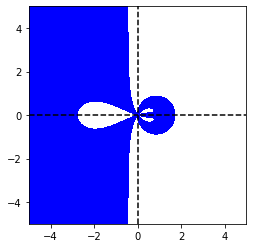

In [4]:
p, q = restricted_pade(3,gamma=1.06857902)
stability_function.plot_order_star(p,q);

Here we recreate and elaborate on Figure 6 of the paper "Order Stars and stability theorems" by Wanner, Hairer & Norsett.

In [5]:
L4 = laguerre(4).deriv()
1./L4.r

array([0.1288864 , 0.30253458, 1.06857902])

In [6]:
def hwnplot(k=3,gamma=1.):
    p, q = restricted_pade(k,gamma)
    stability_function.plot_order_star(p,q,bounds=[-4,4,-4,4]);
    plt.show()
    
interact(hwnplot, gamma=FloatSlider(min=0.12, max=1.07, 
                                    step=0.004, value=1.07));

interactive(children=(IntSlider(value=3, description='k', max=9, min=-3), FloatSlider(value=1.07, description=…